In [1]:
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

def set_seed(seed):
    """Set the random seed for reproducibility."""
    np.random.seed(seed)


set_seed(42)
pd.set_option("display.max_columns", None)

## Data Preparation

### Data Description

**What do the instances in this dataset represent?**

The instances represent hospitalized patient records diagnosed with diabetes.


**Does the dataset contain data that might be considered sensitive in any way?**

Yes. The dataset contains information about the age, gender, and race of the patients.

**Additional Information**

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

### Import data

In [2]:
diabetic = pd.read_csv("data/diabetic_data.csv")
ids_mapping = pd.read_csv("data/IDS_mapping.csv")
features_description = pd.read_csv("data/features_description.csv", sep="\t")

In [3]:
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
ids_mapping.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [5]:
features_description.head()

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,encounter_id,ID,NaN,NaN,Unique identifier of an encounter,NaN,no
1,patient_nbr,ID,NaN,NaN,Unique identifier of a patient,NaN,no
2,race,Feature,Categorical,Race,"Values: Caucasian, Asian, African American, Hi...",NaN,yes
3,gender,Feature,Categorical,Gender,"Values: male, female, and unknown/invalid",NaN,no
4,age,Feature,Categorical,Age,"Grouped in 10-year intervals: [0, 10), [10, 20...",NaN,no


In [6]:
features = features_description[["Variable Name", "Description"]]
features

,Variable Name,Description
0,encounter_id,Unique identifier of an encounter
1,patient_nbr,Unique identifier of a patient
2,race,"Values: Caucasian, Asian, African American, Hi..."
3,gender,"Values: male, female, and unknown/invalid"
4,age,"Grouped in 10-year intervals: [0, 10), [10, 20..."
5,weight,Weight in pounds.
6,admission_type_id,Integer identifier corresponding to 9 distinct...
7,discharge_disposition_id,Integer identifier corresponding to 29 distinc...
8,admission_source_id,Integer identifier corresponding to 21 distinc...
9,time_in_hospital,Integer number of days between admission and d...


In [7]:
features.iloc[2, 1]

'Values: Caucasian, Asian, African American, Hispanic, and other'

In [8]:
for i in range(len(features)):
    description = features.iloc[i, 1]
    feature = features.iloc[i, 0]
    print("---"*50)
    print(f"{feature}: {description}", end="\n\n")

------------------------------------------------------------------------------------------------------------------------------------------------------
encounter_id: Unique identifier of an encounter

------------------------------------------------------------------------------------------------------------------------------------------------------
patient_nbr: Unique identifier of a patient

------------------------------------------------------------------------------------------------------------------------------------------------------
race: Values: Caucasian, Asian, African American, Hispanic, and other

------------------------------------------------------------------------------------------------------------------------------------------------------
gender: Values: male, female, and unknown/invalid

------------------------------------------------------------------------------------------------------------------------------------------------------
age: Grouped in 10-year inter

In [9]:
diabetic[["encounter_id", "admission_type_id"]].dtypes

encounter_id         int64
admission_type_id    int64
dtype: object

In [10]:
map_admission_type = ids_mapping[["admission_type_id", "description"]].set_index("admission_type_id").to_dict()["description"]
map_admission_type

{'1': ' Physician Referral',
 '2': 'Clinic Referral',
 '3': 'HMO Referral',
 '4': 'Transfer from a hospital',
 '5': ' Transfer from a Skilled Nursing Facility (SNF)',
 '6': ' Transfer from another health care facility',
 '7': ' Emergency Room',
 '8': ' Court/Law Enforcement',
 nan: nan,
 'discharge_disposition_id': 'description',
 '9': ' Not Available',
 '10': ' Transfer from critial access hospital',
 '11': 'Normal Delivery',
 '12': ' Premature Delivery',
 '13': ' Sick Baby',
 '14': ' Extramural Birth',
 '15': 'Not Available',
 '16': 'Discharged/transferred/referred another institution for outpatient services',
 '17': nan,
 '18': ' Transfer From Another Home Health Agency',
 '19': 'Readmission to Same Home Health Agency',
 '20': ' Not Mapped',
 '21': 'Unknown/Invalid',
 '22': ' Transfer from hospital inpt/same fac reslt in a sep claim',
 '23': ' Born inside this hospital',
 '24': ' Born outside this hospital',
 '25': ' Transfer from Ambulatory Surgery Center',
 '26': 'Transfer from Ho

In [10]:
map_admission_type = {
"1" : "Emergency",
"2":"Urgent",
"3":"Elective",
"4" :"Newborn",
"5":"Not Available",
"6":"NULL",
"7":"Trauma Center",
"8":"Not Mapped"}

In [11]:
diabetic["admission_type"] = diabetic["admission_type_id"].map(str).map(map_admission_type)

In [12]:
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NULL
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency


### Data type checking

In [13]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [14]:
def data_types_check(df):
    """Check the data types of the DataFrame."""
    non_valid_col = []
    for col in df.columns:
        print(f"Column: {col}, Current Type: {df[col].dtype} | Expected Type: {features_description[features_description['Variable Name'] == col]['Type']}")

In [15]:
data_types_check(diabetic)

Column: encounter_id, Current Type: int64 | Expected Type: 0    NaN
Name: Type, dtype: object
Column: patient_nbr, Current Type: int64 | Expected Type: 1    NaN
Name: Type, dtype: object
Column: race, Current Type: object | Expected Type: 2    Categorical
Name: Type, dtype: object
Column: gender, Current Type: object | Expected Type: 3    Categorical
Name: Type, dtype: object
Column: age, Current Type: object | Expected Type: 4    Categorical
Name: Type, dtype: object
Column: weight, Current Type: object | Expected Type: 5    Categorical
Name: Type, dtype: object
Column: admission_type_id, Current Type: int64 | Expected Type: 6    Categorical
Name: Type, dtype: object
Column: discharge_disposition_id, Current Type: int64 | Expected Type: 7    Categorical
Name: Type, dtype: object
Column: admission_source_id, Current Type: int64 | Expected Type: 8    Categorical
Name: Type, dtype: object
Column: time_in_hospital, Current Type: int64 | Expected Type: 9    Integer
Name: Type, dtype: objec

In [16]:
non_valid_dtypes_cols = ["admission_source_id"]
diabetic[non_valid_dtypes_cols].head()


,admission_source_id
0,1
1,7
2,7
3,7
4,7


`Note : ` The admission_source_id is a categorical feature but,  here it is encode as an integer data type

According to the feature description : admission_source_id => Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital


In [17]:
diabetic["admission_source_id"] = diabetic["admission_source_id"].astype("category")
diabetic[non_valid_dtypes_cols].dtypes

admission_source_id    category
dtype: object

In [18]:
diabetic.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
weight                        object
admission_type_id              int64
discharge_disposition_id       int64
admission_source_id         category
time_in_hospital               int64
payer_code                    object
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
c

In [19]:
diabetic.shape

(101766, 51)

In [20]:
diabetic.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [21]:
diabetic.describe(include="object").T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


### Missing values

In [22]:
diabetic = diabetic.replace({"?":np.nan})

In [23]:
def check_missing_values(df):
    """Check for missing values in the DataFrame."""
    missing_values = df.isnull().mean() * 100
    missing_values = missing_values[missing_values > 0]
    return missing_values

In [24]:
missing_values = check_missing_values(diabetic)
missing_values.sort_values(ascending=False, inplace=True)

In [25]:
missing_values

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

In [26]:
missing_cols = missing_values.index.tolist()
missing_cols

['weight',
 'max_glu_serum',
 'A1Cresult',
 'medical_specialty',
 'payer_code',
 'race',
 'diag_3',
 'diag_2',
 'diag_1']

<Axes: >

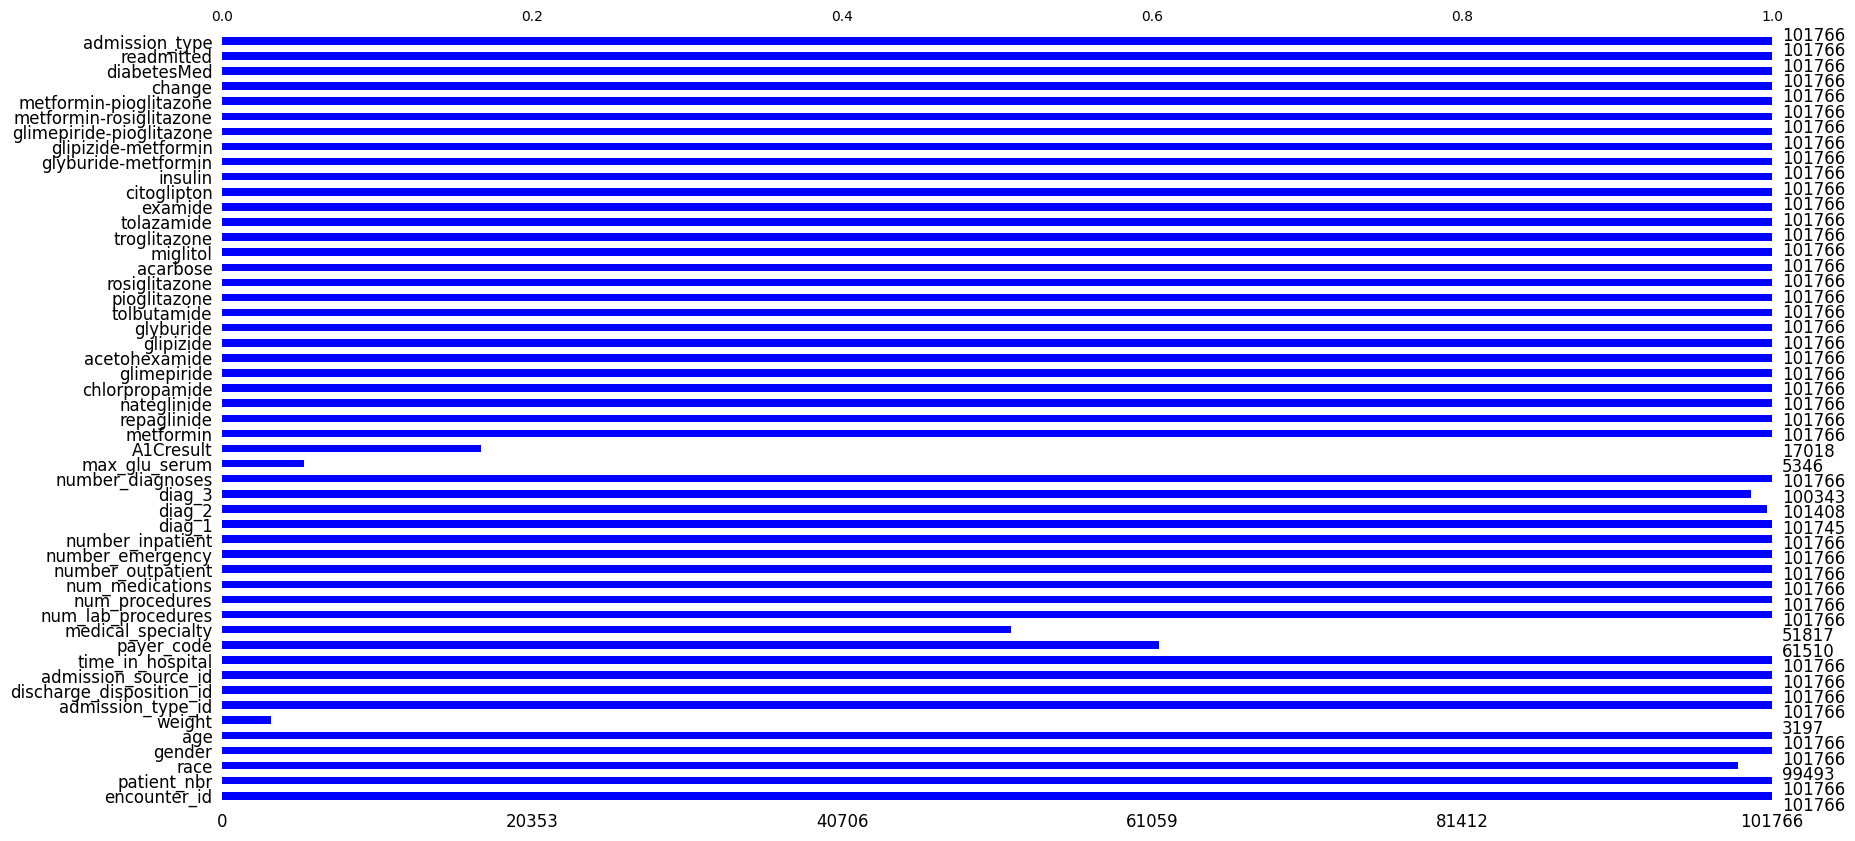

In [27]:
msno.bar(diabetic, figsize=(20, 10), color="blue", fontsize=12)

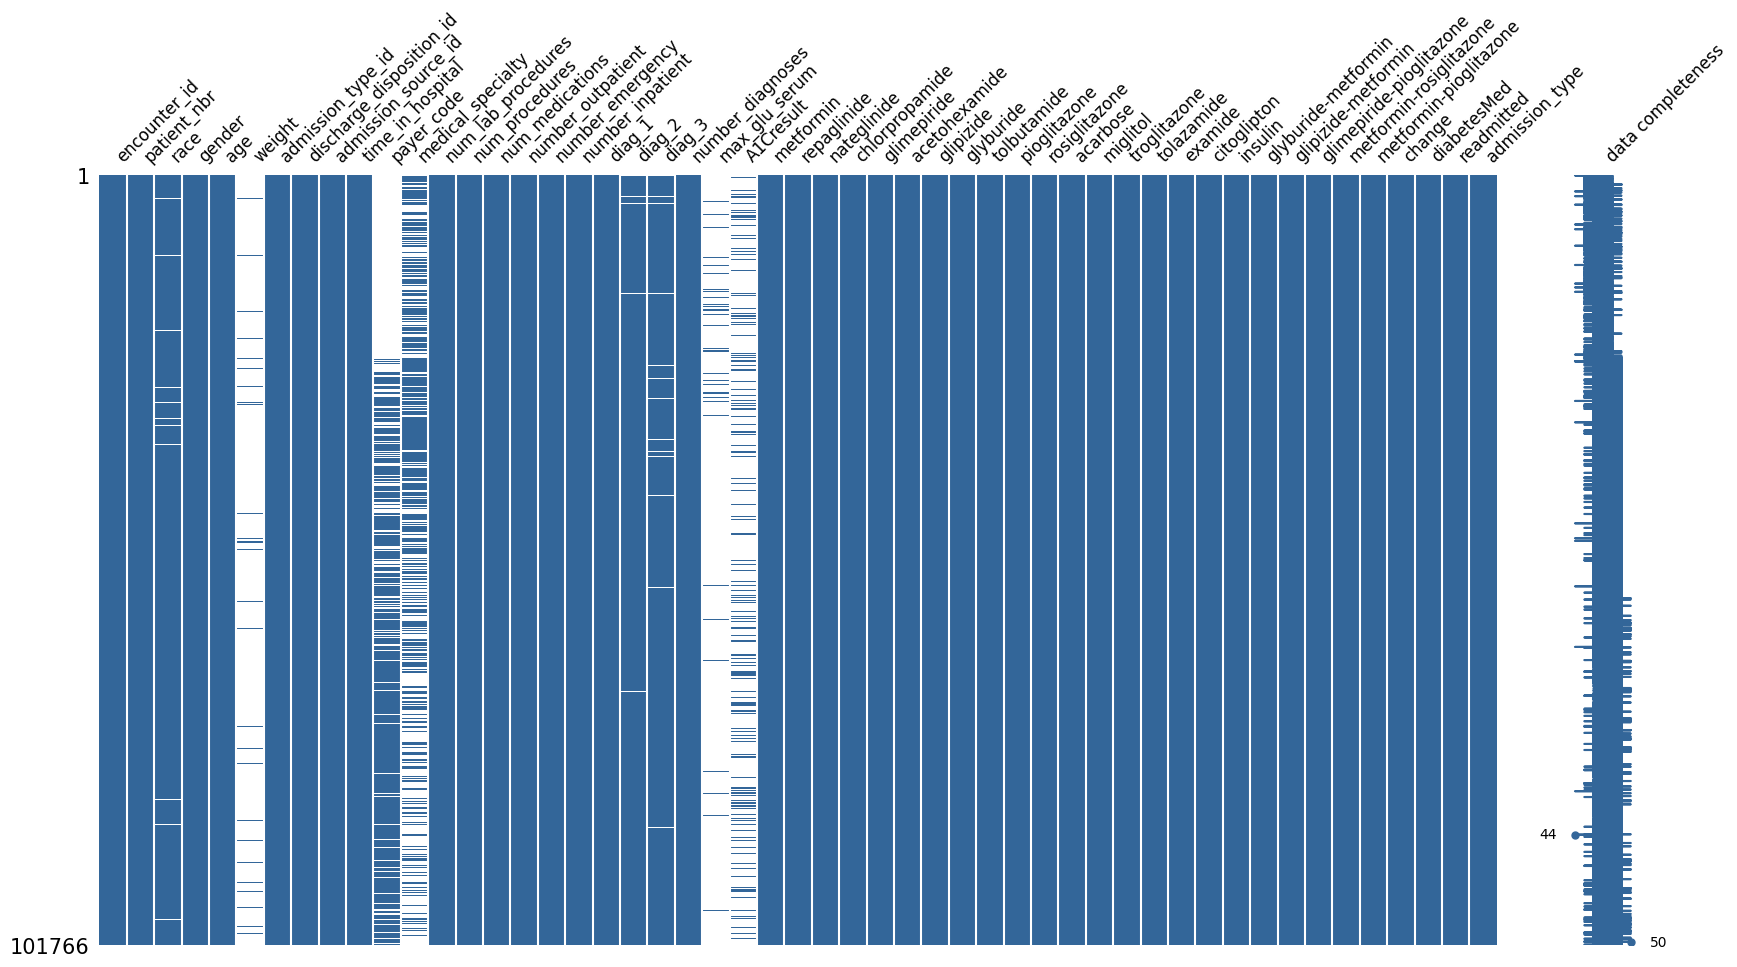

In [28]:
msno.matrix(diabetic, figsize=(20, 10), color=(0.2, 0.4, 0.6),labels=True, fontsize=12)
plt.show()

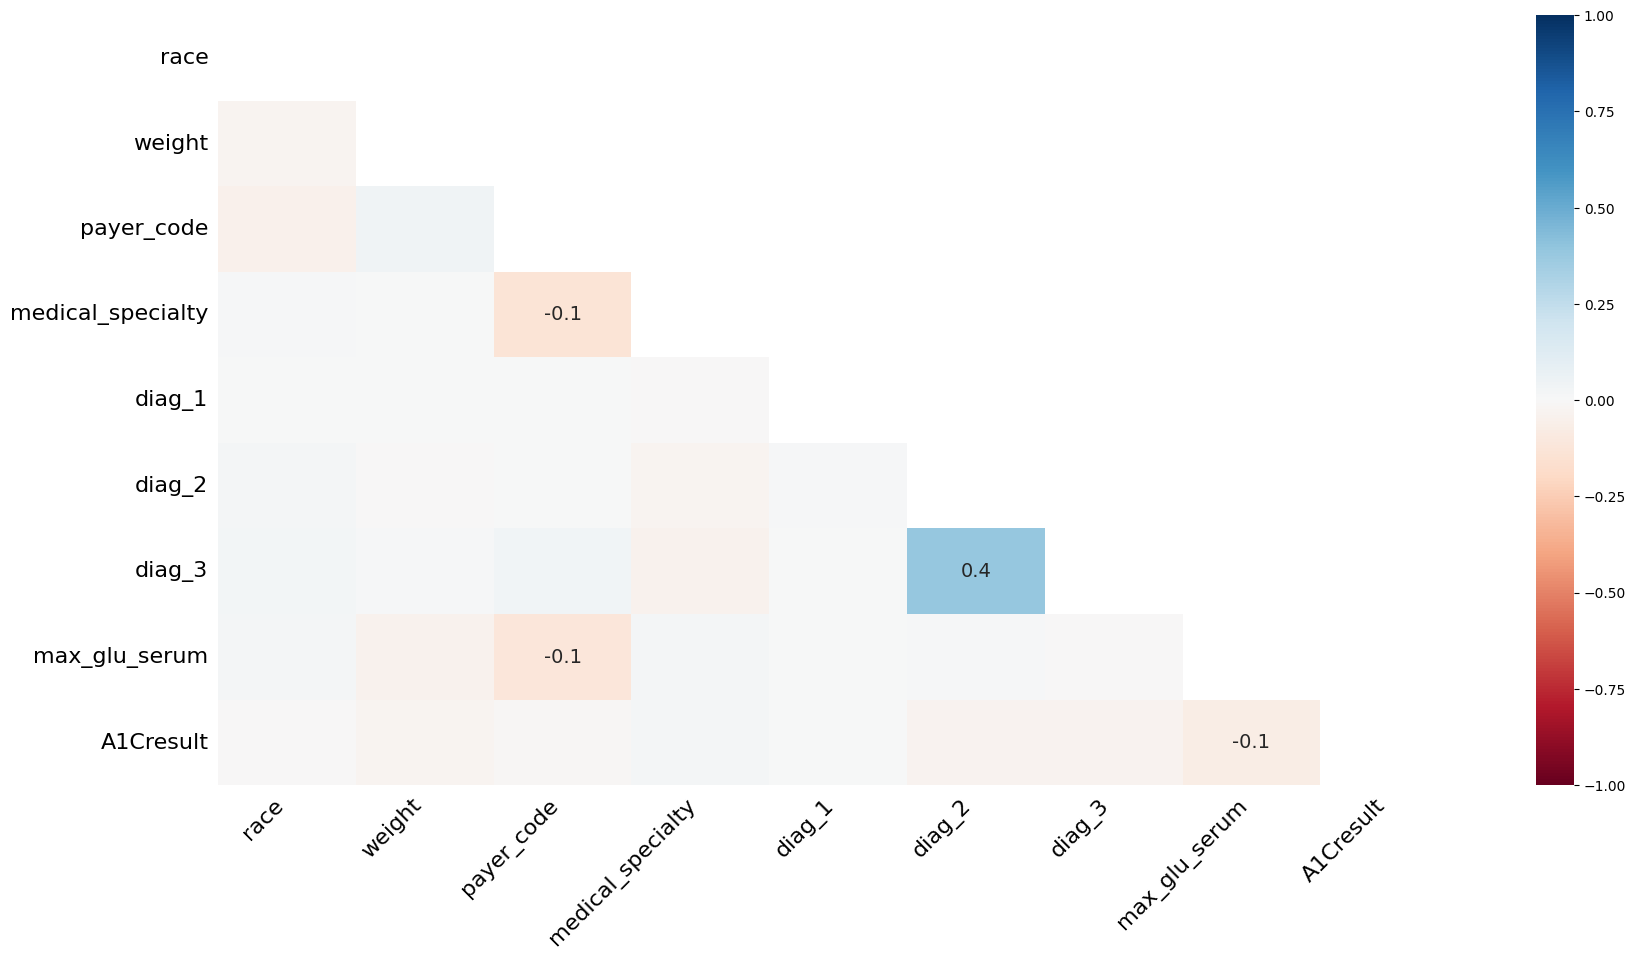

In [29]:
msno.heatmap(diabetic, figsize=(20, 10))
plt.show()

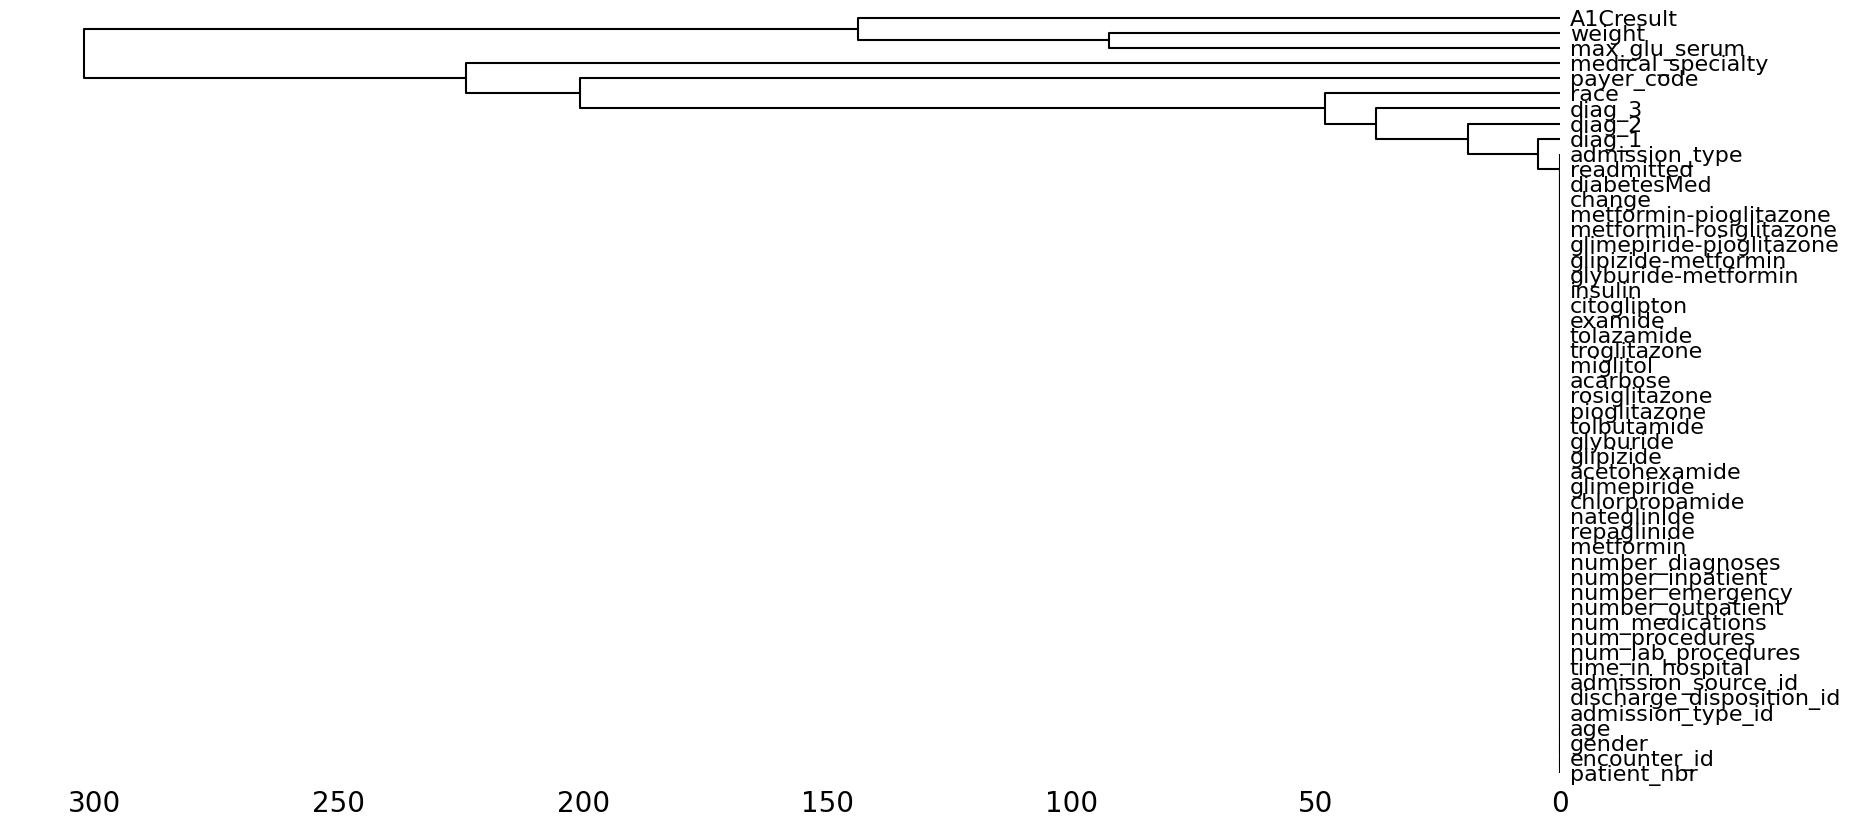

In [30]:
msno.dendrogram(diabetic, figsize=(20, 10))
plt.show()

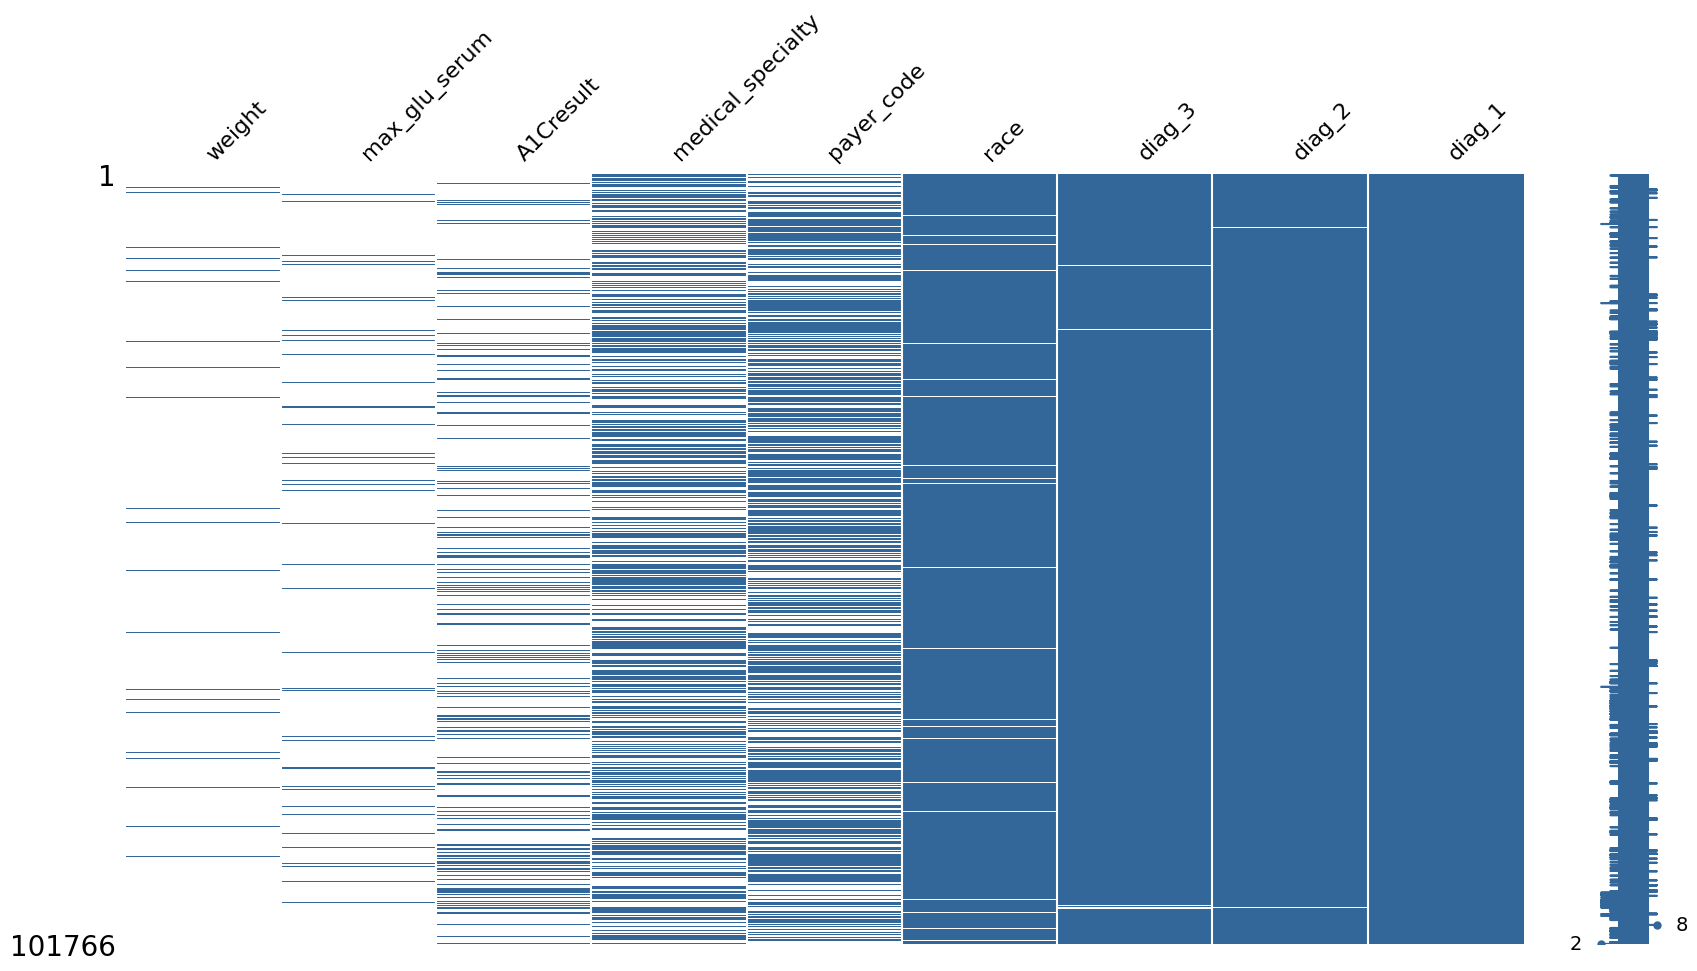

In [31]:
sort_values = diabetic.sort_values(by="diag_1", ascending=False)
msno.matrix(sort_values[missing_cols], figsize=(20, 10), color=(0.2, 0.4, 0.6))
plt.show()

In [32]:
diabetic["readmitted"].value_counts(normalize=True)

readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64

In [33]:
px.bar(diabetic["readmitted"].value_counts(normalize=True), 
       title="Readmission Distribution", labels={"index":"Readmission", "y":"Count"}).update_layout(xaxis_title="Readmission", yaxis_title="Count").show()

In [34]:
def outlier_detection(df, col):
    """Detect outliers in the specified column."""
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    print(f"Outliers detected in {col}: {outlier_count} ({outlier_percentage:.2f}%)")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    if outlier_count > 0:
        return True
    return False

In [35]:
outlier_cols = []
for col in diabetic.select_dtypes(include=[np.number]).columns:
    print(f"\nOutlier detection for {col}:")
    print("-"*50)
    if outlier_detection(diabetic, col):
        outlier_cols.append(col)
        print(f"Outliers detected in {col}.")
    else:
        print(f"No outliers detected in {col}.")



Outlier detection for encounter_id:
--------------------------------------------------
Outliers detected in encounter_id: 0 (0.00%)
Lower Bound: -133003346.25, Upper Bound: 448235427.75
No outliers detected in encounter_id.

Outlier detection for patient_nbr:
--------------------------------------------------
Outliers detected in patient_nbr: 247 (0.24%)
Lower Bound: -72785872.125, Upper Bound: 183745042.875
Outliers detected in patient_nbr.

Outlier detection for admission_type_id:
--------------------------------------------------
Outliers detected in admission_type_id: 341 (0.34%)
Lower Bound: -2.0, Upper Bound: 6.0
Outliers detected in admission_type_id.

Outlier detection for discharge_disposition_id:
--------------------------------------------------
Outliers detected in discharge_disposition_id: 9818 (9.65%)
Lower Bound: -3.5, Upper Bound: 8.5
Outliers detected in discharge_disposition_id.

Outlier detection for time_in_hospital:
------------------------------------------------

In [36]:
outlier_cols

['patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [37]:
import plotly.subplots as sp
import plotly.graph_objects as go

def plot_combined_boxplots(df, cols, rows=1, cols_per_row=3, height=400, width=1000):
    """
    Plot multiple boxplots in a single figure.
    
    Args:
        df: DataFrame
        cols: List of columns to plot
        rows: Number of rows in subplot grid
        cols_per_row: Number of columns per row
        height: Figure height
        width: Figure width
    """
    # Calculate total number of subplots needed
    total_plots = len(cols)
    rows = (total_plots // cols_per_row) + (1 if total_plots % cols_per_row else 0)
    
    # Create subplot grid
    fig = sp.make_subplots(rows=rows, cols=cols_per_row, subplot_titles=cols)
    
    # Add boxplots to subplots
    for i, col in enumerate(cols):
        row = (i // cols_per_row) + 1
        col_num = (i % cols_per_row) + 1
        fig.add_trace(
            go.Box(y=df[col], name=col),
            row=row, col=col_num
        )
    
    # Update layout
    fig.update_layout(
        height=height * rows,  # Scale height by number of rows
        width=width,
        showlegend=False,
        title_text="Combined Boxplots for Outlier Detection"
    )
    fig.show()

# Usage
plot_combined_boxplots(diabetic, outlier_cols)

In [38]:
diabetic.to_csv("data/diabetic.csv", index=False)